#Analiza Prestasaun Estudante Eng Informatika Bazeia ba Valor Materia IP no SO

Analiza simples ida ne'e ami halo sai hanesan mata dalan ne'e bele ajuda ami hodi bele komprende didiak konaba lalaok atu rekolla, prosesa, no analiza dadus sira tuir siensia ne'ebe ami aprende konaba Data Analysis ne'ebe ami aprende husi materia LPA (Laboratorio de Programacao Avancada), Ojetivu husi traballu ne'e la'os deit atu ajuda ami hodi kompleta ba ami nia aprezentasaun final maibe husi dadus sira ne'ebe ami aserta ona husi koluna sira maka hanesan (Sexo, Turma, E.Aman, E.Inan, P.Aman, P.Inan, Aktividade nst), ami bele uza dadus sira ne'e hodi bele fo sai rezultadu sira ne'ebe baibain ami labele hatene sem liu husi metodu analiza dadus nian.

#### Table of Content
1. Import Packages
2. Load Dataset
3. Data Preparation
4. EDA
     - 4.1 Correlation Table
     - 4.2 Distribution of Male and Female also with class A and B
     - 4.3 Final Grade Distribution of (IP - Introduction of Programming)
     - 4.4 Final Grade Distribution of (SO - Operational Systems)
     - 4.5 Distribuition of Grade base on Living Area
     - 4.6 Distribuition of Grade base on Father and Mother Education
     - 4.7 Distribuition of Grade base on Father and Mother Profession
     - 4.8 Percentage Classification Grade Base on Quality of Internet
     - 4.9 Distribution Grade Base Have a Desk for Study
     - 4.10 Distribution Grade Base on Transport to go to School
     - 4.11 Distribution Grade Base on laptop
     - 4.12 Distribution Grade Base on Environment
     - 4.13 Distribution of Grade Depent of Live with Whom
     - 4.14 Distribution Grade Base on Where Stay
5. Linear Regression

###1. Import Necessary Library

In [3]:
# Importing all the necessary libraries
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

###2. Import Dataset

In [4]:
#Import dataset CSV
df = pd.read_csv("Survey_Estudante_Finished_enc.csv")

In [5]:
#Fo sai dadus nia ulun
df.head()

,Naran_Enumerador,Naran,NRE,Sexo,Turma,Hela_Fatin,Eskola_anterior,Edukasaun_Inan,Edukasaun_Aman,Profisaun_Inan,...,Aktividade_Extra,Transporte,Laptop,Rede_Internet,Fatin_estuda,Ambiente,Akompanha,Hela_Iha,Valor_IP,Valor_SO
0,Marcelino R Neves,Eurico Rosario Maria,20200204022,1,0,0,1,3,3,1,...,1,2,0,0,0,0,3,0,7.8,8.3
1,Marcelino R Neves,Alvarino Soares Guterres,20200204003,1,0,1,1,1,4,1,...,1,1,0,0,0,0,1,2,7.5,5.5
2,Marcelino R Neves,Pedro M. A. Abel Soares,20200204070,1,1,1,0,4,4,1,...,0,0,0,0,0,0,1,2,7.2,9.6
3,Marcelino R Neves,Marcelino R Neves,20200204054,1,1,0,2,2,6,1,...,0,2,0,0,0,0,2,2,7.8,8.5
4,Joao Soares,Jose Norberto da silva ximenes,20200204047,1,1,1,2,2,2,1,...,1,2,0,1,1,2,0,1,7.5,6.9


In [6]:
#Fo sai dadus nia ikun
df.tail()

,Naran_Enumerador,Naran,NRE,Sexo,Turma,Hela_Fatin,Eskola_anterior,Edukasaun_Inan,Edukasaun_Aman,Profisaun_Inan,...,Aktividade_Extra,Transporte,Laptop,Rede_Internet,Fatin_estuda,Ambiente,Akompanha,Hela_Iha,Valor_IP,Valor_SO
55,Olgita Goncalves,Cirilio de Jesus Amaral,20200204015,1,0,1,1,5,6,1,...,1,2,0,1,0,1,2,1,5.8,7.8
56,Olgita Goncalves,Basilio M.dos Santos,20200204010,1,0,1,2,5,2,1,...,1,1,0,0,0,1,3,2,7.2,7.0
57,Olgita Goncalves,Alberto da Conceição Pereira,20200204004,1,0,0,1,1,3,1,...,0,1,0,0,0,0,1,2,7.8,5.5
58,Olgita Goncalves,Aldino da costa de jesus,20200204005,1,0,1,0,0,4,1,...,0,1,0,1,0,0,1,2,6.0,7.0
59,Frederico Marcal,Jesuinho A Gaio,20200204041,1,1,0,1,2,0,1,...,0,1,0,1,0,1,3,0,7.5,5.5


In [7]:
#Deskreve konaba dataset
df.describe()

,NRE,Sexo,Turma,Hela_Fatin,Eskola_anterior,Edukasaun_Inan,Edukasaun_Aman,Profisaun_Inan,Profisaun_Aman,Aktividade_Extra,Transporte,Laptop,Rede_Internet,Fatin_estuda,Ambiente,Akompanha,Hela_Iha,Valor_IP,Valor_SO
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.020020e+10,0.766667,0.583333,0.533333,1.200000,2.883333,2.733333,1.383333,1.183333,0.633333,1.466667,0.150000,0.700000,0.200000,0.583333,1.833333,1.366667,7.236667,6.963333
std,2.240874e+01,0.426522,0.497167,0.503098,0.576371,1.832768,1.956013,0.845560,1.431979,0.485961,0.535729,0.360085,0.462125,0.403376,0.590652,1.152252,0.801834,0.766672,1.174296
min,2.020020e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,5.500000
25%,2.020020e+10,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.850000,6.000000
50%,2.020020e+10,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,7.500000,7.000000
75%,2.020020e+10,1.000000,1.000000,1.000000,2.000000,5.000000,4.000000,1.000000,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3.000000,2.000000,7.800000,7.525000
max,2.020020e+10,1.000000,1.000000,1.000000,2.000000,5.000000,6.000000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,8.500000,9.600000


###3. Data Preparation

In [8]:
# convert Valor_IP to categorical variable # Excelent: 8.5~10 Good:7.0~8.4 Sufficient:5.5~6.9
df.loc[(df.Valor_IP >= 8.5) & (df.Valor_IP <= 10), 'Class_Valor_IP'] = 'Excellent' 
df.loc[(df.Valor_IP >= 7.0) & (df.Valor_IP <= 8.4), 'Class_Valor_IP'] = 'Good' 
df.loc[(df.Valor_IP >= 5.5) & (df.Valor_IP <= 6.9), 'Class_Valor_IP'] = 'Sufficient' 

# convert Valor_SO to categorical variable # Excelent: 8.5~10 Good:7.0~8.4 Sufficient:5.5~6.9
df.loc[(df.Valor_SO >= 8.5) & (df.Valor_SO <= 10), 'Class_Valor_SO'] = 'Excellent' 
df.loc[(df.Valor_SO >= 7.0) & (df.Valor_SO <= 8.4), 'Class_Valor_SO'] = 'Good' 
df.loc[(df.Valor_SO >= 5.5) & (df.Valor_SO <= 6.9), 'Class_Valor_SO'] = 'Sufficient' 
df.head(5)

,Naran_Enumerador,Naran,NRE,Sexo,Turma,Hela_Fatin,Eskola_anterior,Edukasaun_Inan,Edukasaun_Aman,Profisaun_Inan,...,Laptop,Rede_Internet,Fatin_estuda,Ambiente,Akompanha,Hela_Iha,Valor_IP,Valor_SO,Class_Valor_IP,Class_Valor_SO
0,Marcelino R Neves,Eurico Rosario Maria,20200204022,1,0,0,1,3,3,1,...,0,0,0,0,3,0,7.8,8.3,Good,Good
1,Marcelino R Neves,Alvarino Soares Guterres,20200204003,1,0,1,1,1,4,1,...,0,0,0,0,1,2,7.5,5.5,Good,Sufficient
2,Marcelino R Neves,Pedro M. A. Abel Soares,20200204070,1,1,1,0,4,4,1,...,0,0,0,0,1,2,7.2,9.6,Good,Excellent
3,Marcelino R Neves,Marcelino R Neves,20200204054,1,1,0,2,2,6,1,...,0,0,0,0,2,2,7.8,8.5,Good,Excellent
4,Joao Soares,Jose Norberto da silva ximenes,20200204047,1,1,1,2,2,2,1,...,0,1,1,2,0,1,7.5,6.9,Good,Sufficient


In [9]:
#Cek Koluna ne'ebe existe iha Dataframe
df.columns

Index(['Naran_Enumerador', 'Naran', 'NRE', 'Sexo', 'Turma', 'Hela_Fatin',
       'Eskola_anterior', 'Edukasaun_Inan', 'Edukasaun_Aman', 'Profisaun_Inan',
       'Profisaun_Aman', 'Aktividade_Extra', 'Transporte', 'Laptop',
       'Rede_Internet', 'Fatin_estuda', 'Ambiente', 'Akompanha', 'Hela_Iha',
       'Valor_IP', 'Valor_SO', 'Class_Valor_IP', 'Class_Valor_SO'],
      dtype='object')

In [10]:
#Haree tipu dadus sira ne'ebe eziste iha kada koluna
df.dtypes

Naran_Enumerador     object
Naran                object
NRE                   int64
Sexo                  int64
Turma                 int64
Hela_Fatin            int64
Eskola_anterior       int64
Edukasaun_Inan        int64
Edukasaun_Aman        int64
Profisaun_Inan        int64
Profisaun_Aman        int64
Aktividade_Extra      int64
Transporte            int64
Laptop                int64
Rede_Internet         int64
Fatin_estuda          int64
Ambiente              int64
Akompanha             int64
Hela_Iha              int64
Valor_IP            float64
Valor_SO            float64
Class_Valor_IP       object
Class_Valor_SO       object
dtype: object

In [11]:
#Haree Eziste Dadus mamuk ka lae
df.isnull().sum()

Naran_Enumerador    0
Naran               0
NRE                 0
Sexo                0
Turma               0
Hela_Fatin          0
Eskola_anterior     0
Edukasaun_Inan      0
Edukasaun_Aman      0
Profisaun_Inan      0
Profisaun_Aman      0
Aktividade_Extra    0
Transporte          0
Laptop              0
Rede_Internet       0
Fatin_estuda        0
Ambiente            0
Akompanha           0
Hela_Iha            0
Valor_IP            0
Valor_SO            0
Class_Valor_IP      0
Class_Valor_SO      0
dtype: int64

In [12]:
#Kria Deskrisaun Konaba Dadus Sira
class Desc:
    def _repr_html_(self):
        return ("<b><h3>Deskrisaun Dadus Sira Iha Kada Koluna:</h3></b><br>"
                "Sexo:<br><ul><li>(0) - Feto</li><li>(1) - Mane</li></ul><br>"
                "Turma:<br><ul><li>(0) - A</li><li>(1) - B</li></ul><br>"
                "Hela_Fatin:<br><ul><li>(0) - Besik</li><li>(1) - Dook</li></ul><br>"
                "Eskola_anterior:<br><ul><li>(0) - Mis</li><li>(1) - Pri</li><li>(2) - Pub</li></ul><br>"
                "Edukasaun_Inan:<br><ul><li>(0) - D3</li><li>(1) - Lae</li><li>(2) - Pre_Sec</li><li>(3) - Pri</li>"
                "<li>(4) - S1</li><li>(5) - Sec</li></ul><br>"
                "Edukasaun_Aman:<br><ul><li>(0) - D3</li><li>(1) - Lae</li><li>(2) - Pre_Sec</li><li>(3) - Pri</li>"
                "<li>(4) - S1</li><li>(5) - S3</li><li>(6) - Sec</li></ul><br>"
                "Profisaun_Inan:<br><ul><li>(0) - Agri</li><li>(1) - DC</li><li>(2) - Fun</li><li>(3) - Prof</li><li>(4) - Seluk</li></ul><br>"
                "Profisaun_Aman:<br><ul><li>(0) - Agri</li><li>(1) - Fun</li><li>(2) - Med</li><li>(3) - Prof</li><li>(4) - Seluk</li></ul><br>"
                "Aktividade_Extra:<br><ul><li>(0) - Laiha</li><li>(1) - Iha</li></ul><br>"
                "Transporte:<br><ul><li>(0) - Kareta</li><li>(1) - Motor</li><li>(2) - TP</li></ul><br>"
                "Laptop:<br><ul><li>(0) - Iha</li><li>(1) - Laiha</li></ul><br>"
                "Rede_Internet:<br><ul><li>(0) - Diak</li><li>(1) - Ladun Diak</li></ul><br>"
                "Fatin_estuda:<br><ul><li>(0) - Iha</li><li>(1) - Laiha</li></ul><br>"
                "Ambiente:<br><ul><li>(0) - Ajuda tebes</li><li>(1) - Baibain</li><li>(2) - Ladun ajuda</li></ul><br>"
                "Akompanha:<br><ul><li>(0) - Familia Seluk</li><li>(1) - Inan Aman</li><li>(2) - Maun-Bin</li><li>(3) - Mesak</li><li>(4) - Tio-Tia</li></ul><br>"
                "Hela_Iha:<br><ul><li>(0) - Aluga Kos</li><li>(1) - Familia Sira nia Uma</li><li>(2) - Uma Rasik</li></ul><br>")

Desc = Desc()
Desc

###4. EDA (Exploratory Data Analysis)

#####4.1 Correlation Table

<AxesSubplot:>

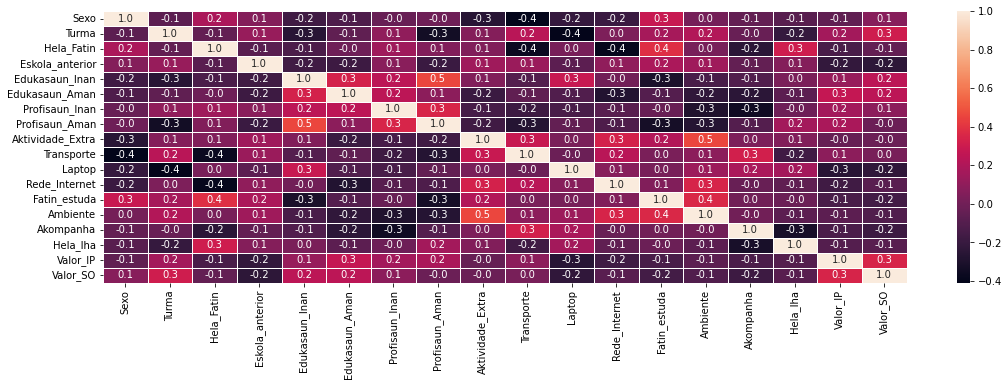

In [13]:
#Muda NRE ba Category hodi exclude nia husi Correlation Table
df['NRE'] = df['NRE'].astype('category')

correlation_matrix = df.corr().round(2) 
# annot = True atu fo sai value sira iha tabela laran
plt.figure(figsize = (18,5))
sns.heatmap(data=correlation_matrix, annot=True, fmt=".1f", linewidth=.5,)

####4.2 Distribution of Male and Female also with class A and B

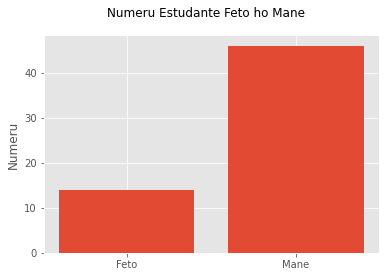

In [14]:
#Histograma Fo sai Numeru Estudante Feto ho Mane

#Kalkula Feto ho mane hamutuk hira
feto = len(df[df['Sexo'] == 0])
mane = len(df[df['Sexo'] == 1])

#Histograma
x = np.arange(2)
plt.style.use('ggplot')
plt.suptitle("Numeru Estudante Feto ho Mane")
plt.bar(x, height=[feto, mane])
plt.ylabel("Numeru")
plt.xticks(x, ['Feto','Mane']);

In [15]:
print('Feto:', feto, ' Mane:', mane)

Feto: 14  Mane: 46


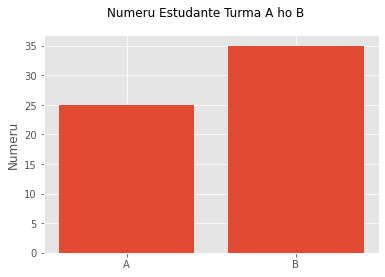

In [16]:
#Histograma Fo sai Numeru Estudante Turma A ho B

#Kalkula Turma A ho B hamutuk hira
turma_a = len(df[df['Turma'] == 0])
turma_b = len(df[df['Turma'] == 1])

#Histograma
x = np.arange(2)
plt.style.use('ggplot')
plt.suptitle("Numeru Estudante Turma A ho B")
plt.bar(x, height=[turma_a, turma_b])
plt.ylabel("Numeru")
plt.xticks(x, ['A','B']);

In [17]:
print('A:', turma_a, ' B:', turma_b)

A: 25  B: 35


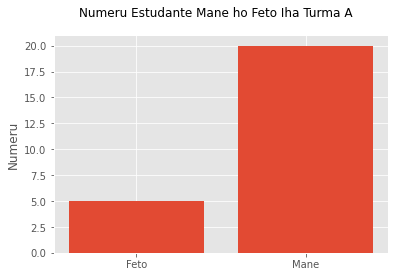

In [18]:
#Histograma Fo sai Numeru Estudante Mane ho Feto Iha Turma A

#Kalkula Feto ho mane hamutuk hira
feto_a = len(df.loc[(df.Turma == 0) & (df.Sexo == 0)])
mane_a = len(df.loc[(df.Turma == 0) & (df.Sexo == 1)])

#Histograma
x = np.arange(2)
plt.style.use('ggplot')
plt.suptitle("Numeru Estudante Mane ho Feto Iha Turma A")
plt.bar(x, height=[feto_a, mane_a])
plt.ylabel("Numeru")
plt.xticks(x, ['Feto','Mane']);

In [19]:
print('Feto:', feto_a, ' Mane:', mane_a)

Feto: 5  Mane: 20


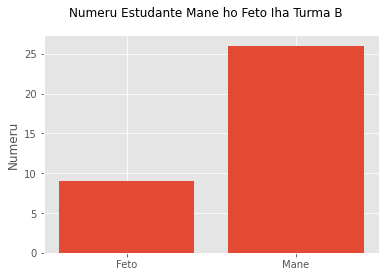

In [20]:
#Histograma Fo sai Numeru Estudante Mane ho Feto Iha Turma B

#Kalkula Feto ho mane hamutuk hira
feto_b = len(df.loc[(df.Turma == 1) & (df.Sexo == 0)]) 
mane_b = len(df.loc[(df.Turma == 1) & (df.Sexo == 1)])

#Histograma
x = np.arange(2)
plt.style.use('ggplot')
plt.suptitle("Numeru Estudante Mane ho Feto Iha Turma B")
plt.bar(x, height=[feto_b, mane_b])
plt.ylabel("Numeru")
plt.xticks(x, ['Feto','Mane']);

In [21]:
print('Feto:', feto_b, ' Mane:', mane_b)

Feto: 9  Mane: 26


####4.3 Final Grade Distribution of (IP - Introduction of Programming)

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Numeru Estudante')

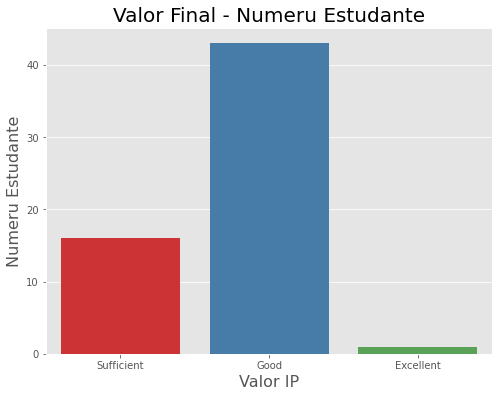

In [22]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.Class_Valor_IP, order=["Sufficient","Good","Excellent"], palette='Set1')
plt.title('Valor Final - Numeru Estudante',fontsize=20)
plt.xlabel('Valor IP', fontsize=16)
plt.ylabel('Numeru Estudante', fontsize=16)

####4.4 Final Grade Distribution of (SO - Operational Systems)

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Numeru Estudante')

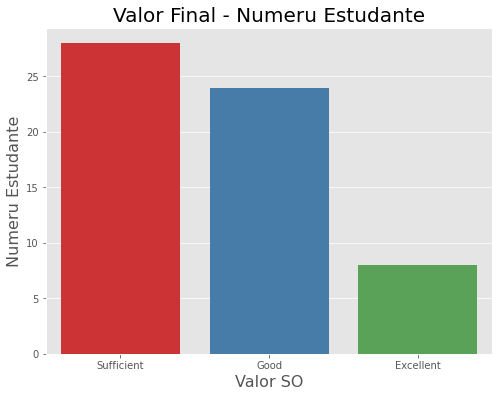

In [23]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.Class_Valor_SO, order=["Sufficient","Good","Excellent"], palette='Set1')
plt.title('Valor Final - Numeru Estudante',fontsize=20)
plt.xlabel('Valor SO', fontsize=16)
plt.ylabel('Numeru Estudante', fontsize=16)

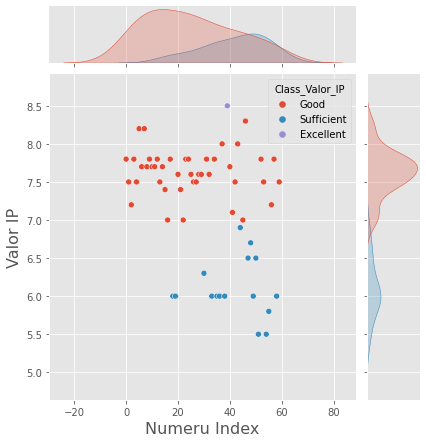

In [24]:
#Valor IP Estudante sira nian bazeia ba iha Scattered

est = df.index.values.tolist()

gr = sns.jointplot(data=df, x=est, y='Valor_IP', hue="Class_Valor_IP")
gr.set_axis_labels('Numeru Index', 'Valor IP', fontsize=16)

#JUSTIFIKASAUN:

#Iha vizualizasaun scattered ida ne'e ami uza label ba lado X ho 'Numeru Estudante' tamba ne'e haree-nain ladun entende ho didiak konaba signifikadu husi lado X
#Tamba ne'e ami klarifika hodi muda lado X ba iha Numeru Index Dataframe.

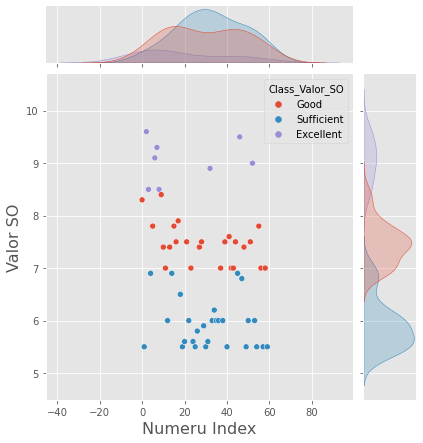

In [25]:
#Valor SO Estudante sira nian bazeia ba iha Scattered
gr = sns.jointplot(data=df, x=est, y='Valor_SO', hue="Class_Valor_SO")
gr.set_axis_labels('Numeru Index', 'Valor SO', fontsize=16)

#JUSTIFIKASAUN:

#Iha vizualizasaun scattered ida ne'e ami uza label ba lado X ho 'Numeru Estudante' tamba ne'e haree-nain ladun entende ho didiak konaba signifikadu husi lado X
#Tamba ne'e ami klarifika hodi muda lado X ba iha Numeru Index Dataframe.

####4.5 Distribuition of Grade base on Living Area

In [26]:
# #Muda variavel 0 ho 1 ba Besik no Dook
# df.Hela_Fatin = df.Hela_Fatin.map({0:'Besik', 1:'Dook'})

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


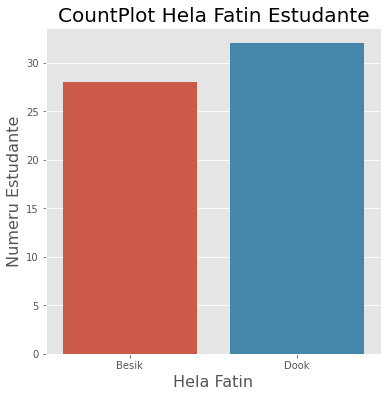

In [27]:
#Histograma Hela Fatin Estudante
plt.figure(figsize=(6,6))
hela = sns.countplot(df.Hela_Fatin)
hela.set_xticklabels(['Besik', 'Dook'])
plt.title('CountPlot Hela Fatin Estudante', fontsize=20)
plt.xlabel('Hela Fatin', fontsize=16)
plt.ylabel('Numeru Estudante', fontsize=16)
plt.show()

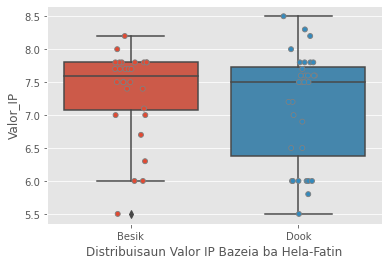

In [28]:
#Distribuisaun Valor IP Estudante nian bazeia ba Hela Fatin
ax = sns.boxplot(x = "Hela_Fatin", y= "Valor_IP", data = df)
ax = sns.stripplot(x = "Hela_Fatin", y= "Valor_IP", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set(xlabel = "Distribuisaun Valor IP Bazeia ba Hela-Fatin")
ax.set_xticklabels(['Besik', 'Dook'])
plt.show()

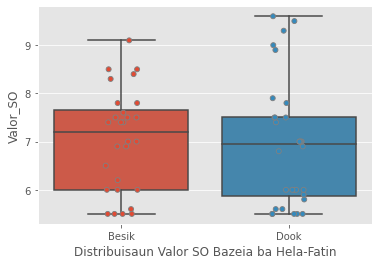

In [29]:
#Distribuisaun Valor SO Estudante nian bazeia ba Hela Fatin
ax = sns.boxplot(x = "Hela_Fatin", y= "Valor_SO", data = df)
ax = sns.stripplot(x = "Hela_Fatin", y= "Valor_SO", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set(xlabel = "Distribuisaun Valor SO Bazeia ba Hela-Fatin")
ax.set_xticklabels(['Besik', 'Dook'])
plt.show()

####4.6 Distribuition of Grade base on Father and Mother Education

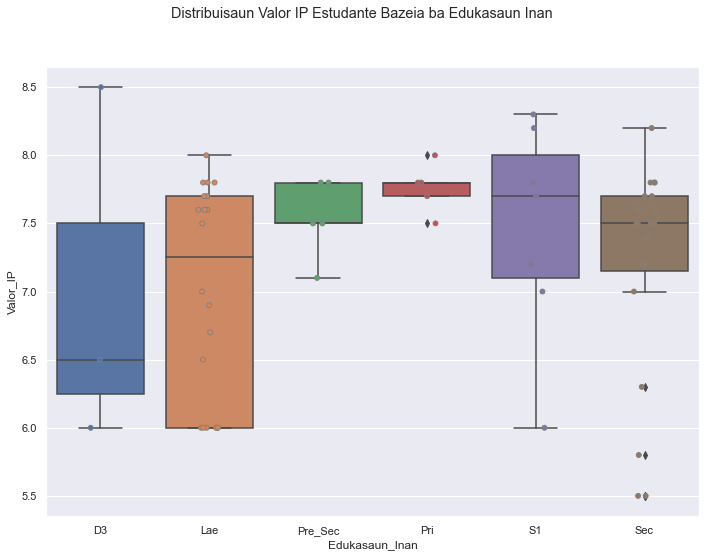

In [30]:
#Distribuisaun Valor IP Estudante nian bazeia Inan nia Edukasaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Edukasaun_Inan", y= "Valor_IP", data = df)
ax = sns.stripplot(x = "Edukasaun_Inan", y= "Valor_IP", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['D3', 'Lae', 'Pre_Sec', 'Pri', 'S1', 'Sec']) #(0) - D3, (1) - Lae, (2) - Pre_Sec, (3) - Pri, (4) - S1, (5) - Sec
plt.suptitle("Distribuisaun Valor IP Estudante Bazeia ba Edukasaun Inan")
plt.show()

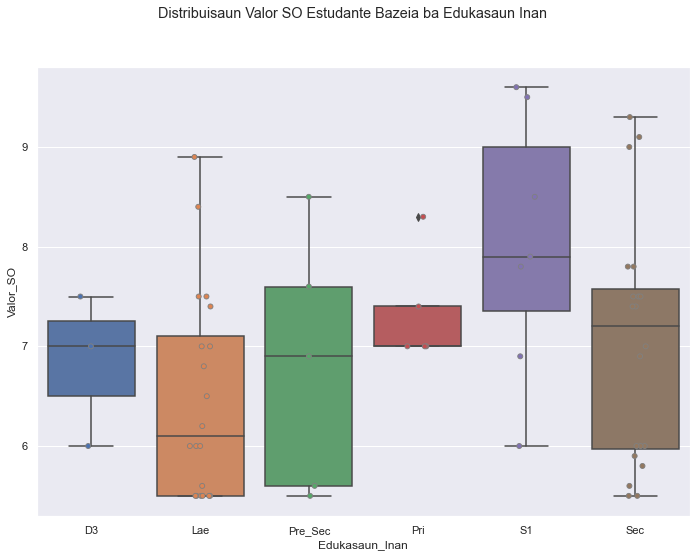

In [31]:
#Distribuisaun Valor SO Estudante nian bazeia Inan nia Edukasaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Edukasaun_Inan", y= "Valor_SO", data = df)
ax = sns.stripplot(x = "Edukasaun_Inan", y= "Valor_SO", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['D3', 'Lae', 'Pre_Sec', 'Pri', 'S1', 'Sec']) #(0) - D3, (1) - Lae, (2) - Pre_Sec, (3) - Pri, (4) - S1, (5) - Sec
plt.suptitle("Distribuisaun Valor SO Estudante Bazeia ba Edukasaun Inan")
plt.show()

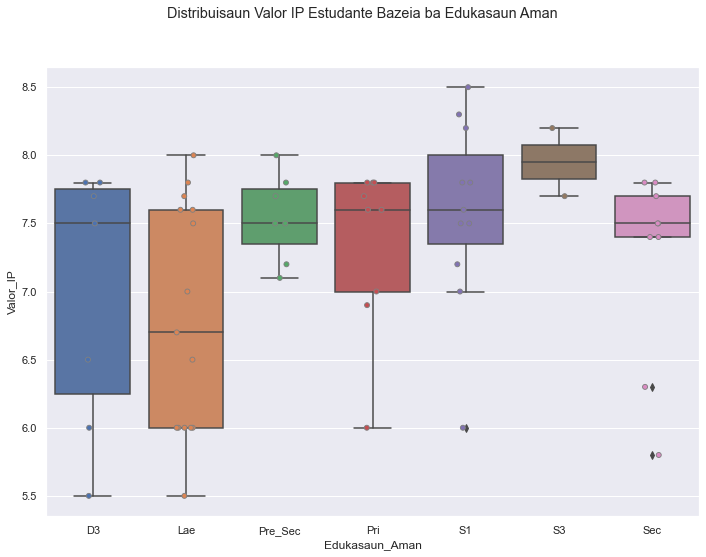

In [32]:
#Distribuisaun Valor IP Estudante nian bazeia Aman nia Edukasaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Edukasaun_Aman", y= "Valor_IP", data = df)
ax = sns.stripplot(x = "Edukasaun_Aman", y= "Valor_IP", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['D3', 'Lae', 'Pre_Sec', 'Pri', 'S1', 'S3','Sec']) #(0) - D3, (1) - Lae, (2) - Pre_Sec, (3) - Pri, (4) - S1, (5) - S3, (6) - Sec
plt.suptitle("Distribuisaun Valor IP Estudante Bazeia ba Edukasaun Aman")
plt.show()

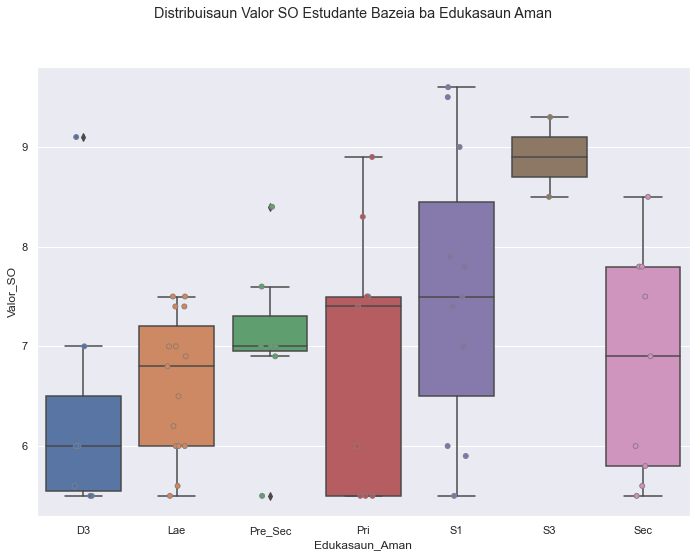

In [33]:
#Distribuisaun Valor SO Estudante nian bazeia Aman nia Edukasaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Edukasaun_Aman", y= "Valor_SO", data = df)
ax = sns.stripplot(x = "Edukasaun_Aman", y= "Valor_SO", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['D3', 'Lae', 'Pre_Sec', 'Pri', 'S1', 'S3','Sec']) #(0) - D3, (1) - Lae, (2) - Pre_Sec, (3) - Pri, (4) - S1, (5) - S3, (6) - Sec
plt.suptitle("Distribuisaun Valor SO Estudante Bazeia ba Edukasaun Aman")
plt.show()

####4.7 Distribuition of Grade base on Father and Mother Profession

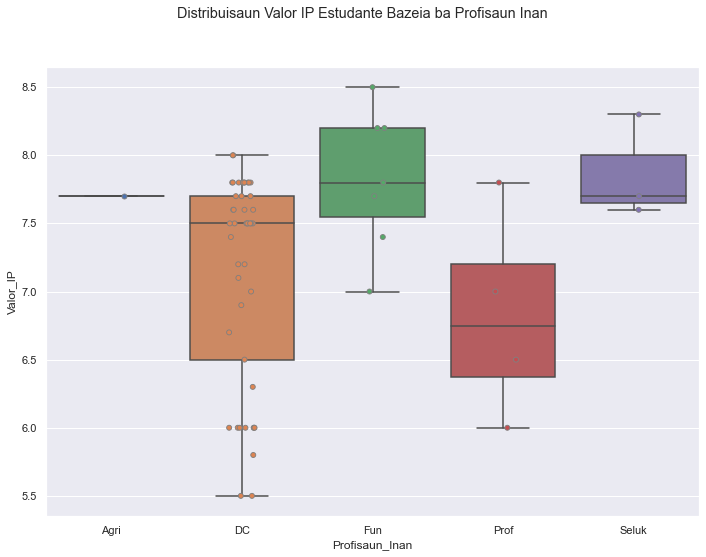

In [34]:
#Distribuisaun Valor IP Estudante nian bazeia Inan nia Profisaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Profisaun_Inan", y= "Valor_IP", data = df)
ax = sns.stripplot(x = "Profisaun_Inan", y= "Valor_IP", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Agri', 'DC', 'Fun', 'Prof', 'Seluk']) #(0) - Agri, (1) - DC, (2) - Fun, (3) - Prof, (4) - Seluk
plt.suptitle("Distribuisaun Valor IP Estudante Bazeia ba Profisaun Inan")
plt.show()

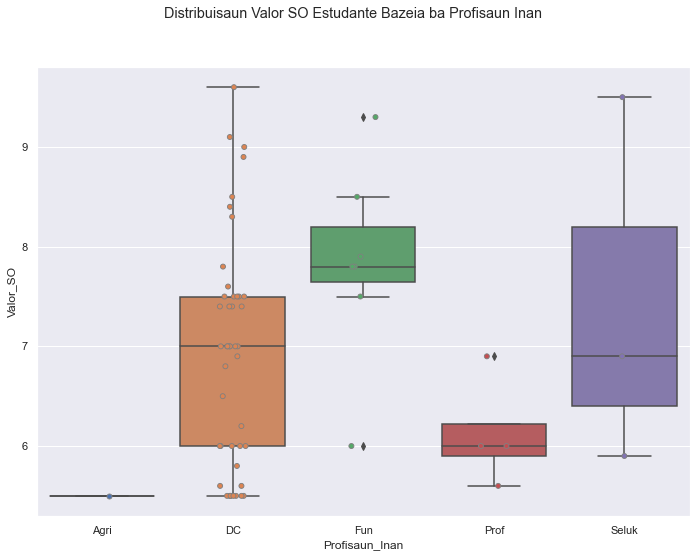

In [35]:
#Distribuisaun Valor SO Estudante nian bazeia Inan nia Profisaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Profisaun_Inan", y= "Valor_SO", data = df)
ax = sns.stripplot(x = "Profisaun_Inan", y= "Valor_SO", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Agri', 'DC', 'Fun', 'Prof', 'Seluk']) #(0) - Agri, (1) - DC, (2) - Fun, (3) - Prof, (4) - Seluk
plt.suptitle("Distribuisaun Valor SO Estudante Bazeia ba Profisaun Inan")
plt.show()

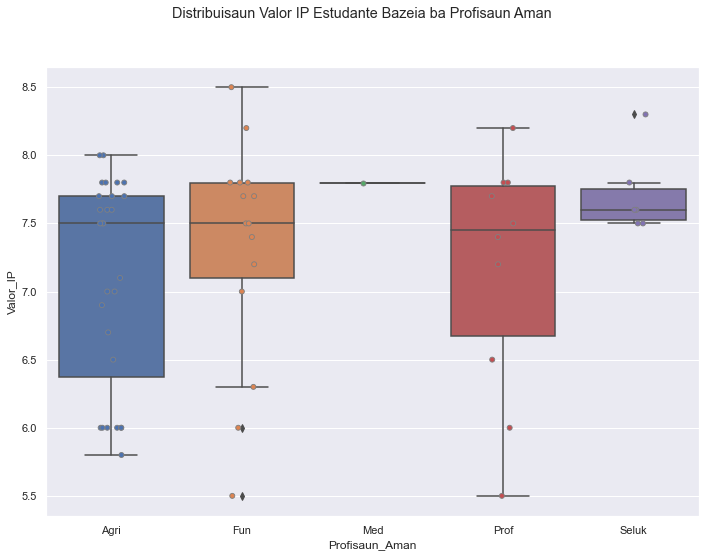

In [36]:
#Distribuisaun Valor IP Estudante nian bazeia Aman nia Profisaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Profisaun_Aman", y= "Valor_IP", data = df)
ax = sns.stripplot(x = "Profisaun_Aman", y= "Valor_IP", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Agri', 'Fun', 'Med', 'Prof', 'Seluk']) #(0) - Agri, (1) - Fun, (2) - Med, (3) - Prof, (4)
plt.suptitle("Distribuisaun Valor IP Estudante Bazeia ba Profisaun Aman")
plt.show()

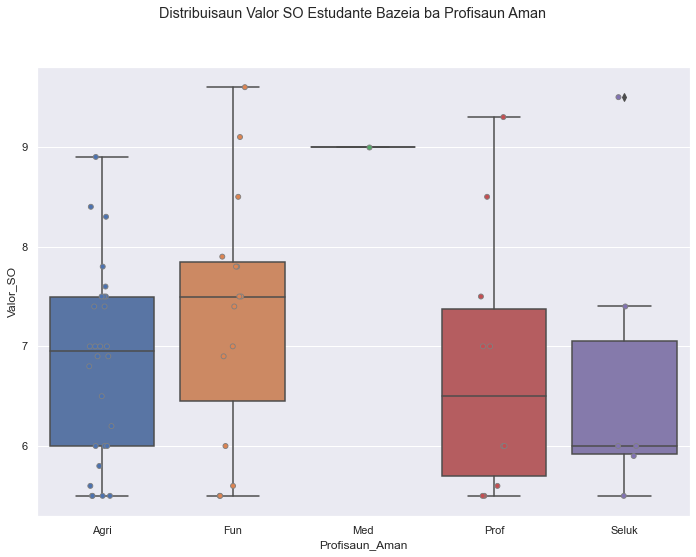

In [37]:
#Distribuisaun Valor SO Estudante nian bazeia Aman nia Profisaun
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x = "Profisaun_Aman", y= "Valor_SO", data = df)
ax = sns.stripplot(x = "Profisaun_Aman", y= "Valor_SO", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Agri', 'Fun', 'Med', 'Prof', 'Seluk']) #(0) - Agri, (1) - Fun, (2) - Med, (3) - Prof, (4)
plt.suptitle("Distribuisaun Valor SO Estudante Bazeia ba Profisaun Aman")
plt.show()

####4.8 Percentage Classification Grade Base on Quality of Internet

In [38]:
# #Muda variavel 0 ho 1 ba Besik no Dook
# df.Rede_Internet = df.Rede_Internet.map({0:'Diak', 1:'Ladun_Diak'})

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


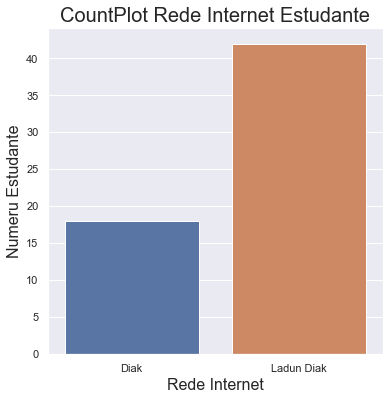

In [39]:
#Histograma Rede Internet Estudante
plt.figure(figsize=(6,6))
rede = sns.countplot(df.Rede_Internet)
rede.set_xticklabels(['Diak', 'Ladun Diak'])
plt.title('CountPlot Rede Internet Estudante', fontsize=20)
plt.xlabel('Rede Internet', fontsize=16)
plt.ylabel('Numeru Estudante', fontsize=16)
plt.show()

In [40]:
#Halo Klasifikasaun entre Class IP ho Rede Internet
perc = (lambda col: col/20)
index = ['Sufficient','Good','Excellent']
rede_tab1 = pd.crosstab(index=df.Class_Valor_IP, columns=df.Rede_Internet)
rede_tab = np.log(rede_tab1)
rede_perc = rede_tab.apply(perc).reindex(index)

<Figure size 842.4x595.44 with 0 Axes>

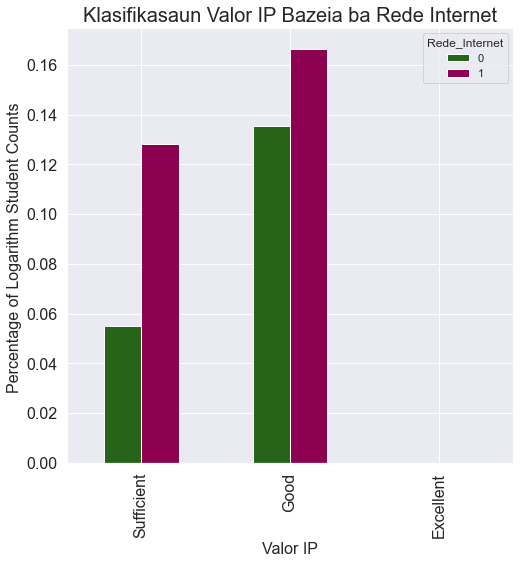

In [41]:
plt.figure()
rede_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Klasifikasaun Valor IP Bazeia ba Rede Internet', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Valor IP', fontsize=16)
plt.show()

In [42]:
#Halo Klasifikasaun entre Class SO ho Rede Internet
perc = (lambda col: col/col.sum())
index = ['Sufficient','Good','Excellent']
rede_tab1 = pd.crosstab(index=df.Class_Valor_SO, columns=df.Rede_Internet)
rede_tab = np.log(rede_tab1)
rede_perc = rede_tab.apply(perc).reindex(index)

<Figure size 842.4x595.44 with 0 Axes>

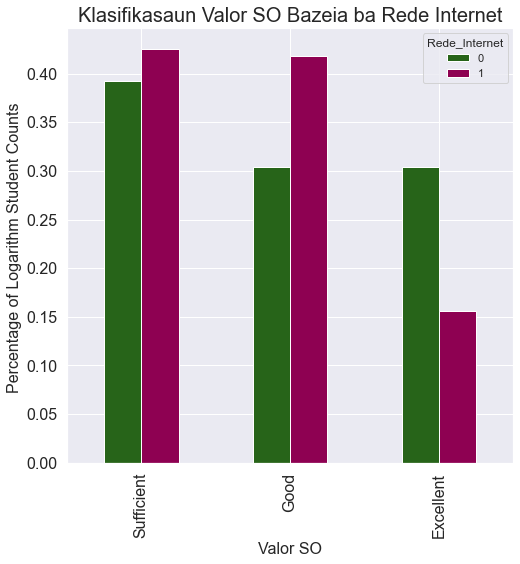

In [43]:
plt.figure()
rede_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Klasifikasaun Valor SO Bazeia ba Rede Internet', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Valor SO', fontsize=16)
plt.show()

####4.9 Distribution Grade Base Have a Desk for Study

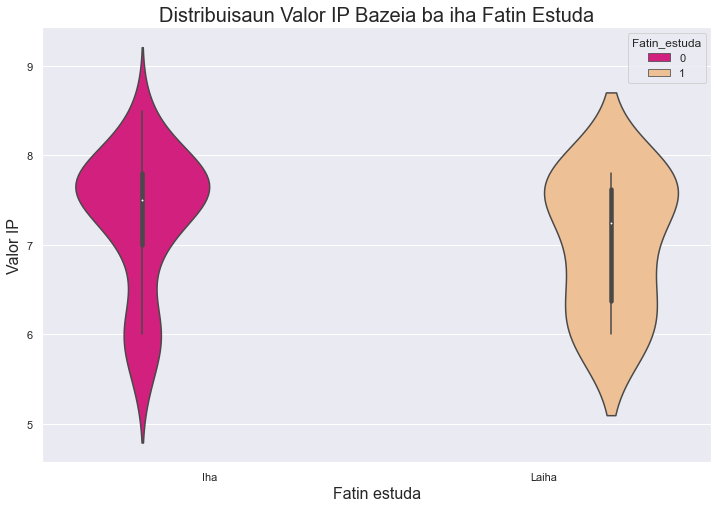

In [44]:
# Distribuisaun Valor IP Bazeia ba iha Fatin Estuda
plt.figure(figsize=(12,8))
sns.violinplot(x='Fatin_estuda', y='Valor_IP', hue='Fatin_estuda', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribuisaun Valor IP Bazeia ba iha Fatin Estuda', fontsize=20)
plt.ylabel('Valor IP', fontsize=16)
plt.xlabel('Fatin estuda', fontsize=16)
plt.xticks(x, ['Iha','Laiha']);

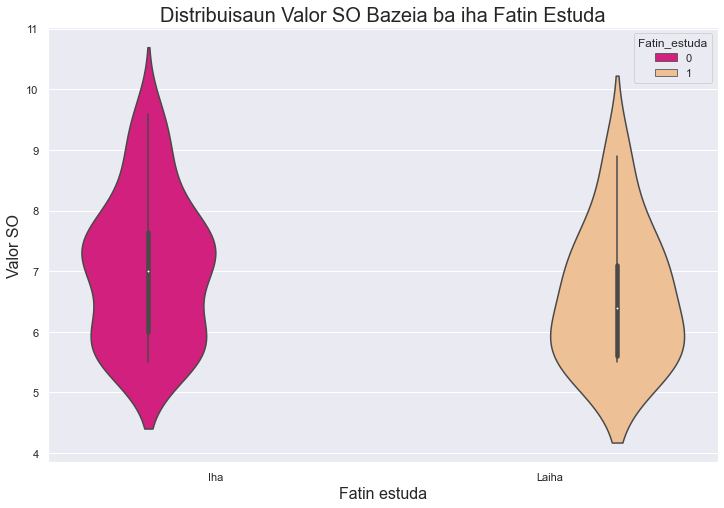

In [45]:
# Distribuisaun Valor SO Bazeia ba iha Fatin Estuda
plt.figure(figsize=(12,8))
sns.violinplot(x='Fatin_estuda', y='Valor_SO', hue='Fatin_estuda', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribuisaun Valor SO Bazeia ba iha Fatin Estuda', fontsize=20)
plt.ylabel('Valor SO', fontsize=16)
plt.xlabel('Fatin estuda', fontsize=16)
plt.xticks(x, ['Iha','Laiha']);

####4.10 Distribution Grade Base on Transport to go to School

[Text(0, 0, 'Kareta'), Text(1, 0, 'Motor'), Text(2, 0, 'TP')]

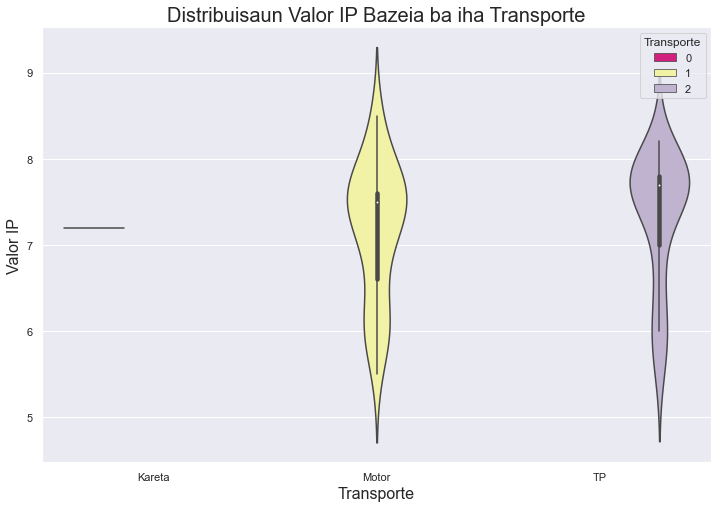

In [46]:
# Distribuisaun Valor IP Bazeia ba iha Transporte
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='Transporte', y='Valor_IP', hue='Transporte', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribuisaun Valor IP Bazeia ba iha Transporte', fontsize=20)
plt.ylabel('Valor IP', fontsize=16)
plt.xlabel('Transporte', fontsize=16)
ax.set_xticklabels(['Kareta', 'Motor', 'TP'])

[Text(0, 0, 'Kareta'), Text(1, 0, 'Motor'), Text(2, 0, 'TP')]

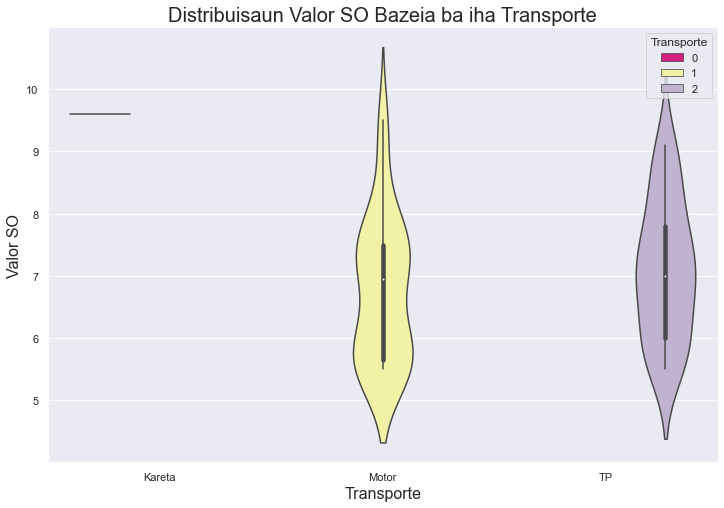

In [47]:
# Distribuisaun Valor SO Bazeia ba iha Transporte
plt.figure(figsize=(12,8))
ax = sns.violinplot(x='Transporte', y='Valor_SO', hue='Transporte', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribuisaun Valor SO Bazeia ba iha Transporte', fontsize=20)
plt.ylabel('Valor SO', fontsize=16)
plt.xlabel('Transporte', fontsize=16)
ax.set_xticklabels(['Kareta', 'Motor', 'TP'])

####4.11 Distribution Grade Base on laptop

Text(0.5, 0.98, 'Distribuisaun Valor IP Bazeia ba Laptop')

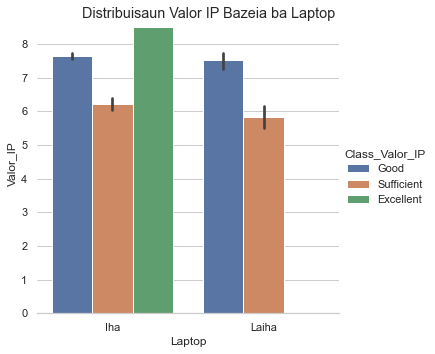

In [48]:
sns.set_theme(style="whitegrid")

#Barplot ba Klasifikasaun valor IP
g = sns.catplot(
    data=df, kind="bar",
    x="Laptop", y="Valor_IP", hue="Class_Valor_IP"
)
g.despine(left=True)
g.set_axis_labels("Laptop", "Valor_IP")
g.set_xticklabels(['Iha', 'Laiha'])
plt.suptitle("Distribuisaun Valor IP Bazeia ba Laptop")

Text(0.5, 0.98, 'Distribuisaun Valor SO Estudante Bazeia ba Laptop')

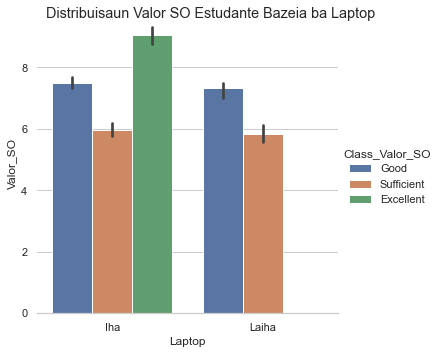

In [49]:
sns.set_theme(style="whitegrid")

#Barplot ba Klasifikasaun valor SO
g = sns.catplot(
    data=df, kind="bar",
    x="Laptop", y="Valor_SO", hue="Class_Valor_SO"
)
g.despine(left=True)
g.set_axis_labels("Laptop", "Valor_SO")
g.set_xticklabels(['Iha', 'Laiha'])
plt.suptitle("Distribuisaun Valor SO Estudante Bazeia ba Laptop")

####4.12 Distribution Grade Base on Environment

Text(0.5, 0.98, 'Distribuisaun Valor IP Estudante Bazeia ba Ambiente')

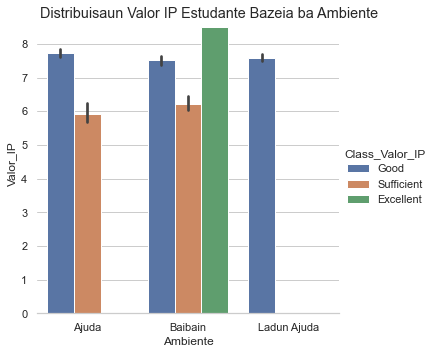

In [50]:
sns.set_theme(style="whitegrid")

#Barplot ba Klasifikasaun valor IP
g = sns.catplot(
    data=df, kind="bar",
    x="Ambiente", y="Valor_IP", hue="Class_Valor_IP"
)
g.despine(left=True)
g.set_axis_labels("Ambiente", "Valor_IP")
g.set_xticklabels(['Ajuda','Baibain', 'Ladun Ajuda'])
plt.suptitle("Distribuisaun Valor IP Estudante Bazeia ba Ambiente")

Text(0.5, 0.98, 'Distribuisaun Valor SO Estudante Bazeia ba Ambiente')

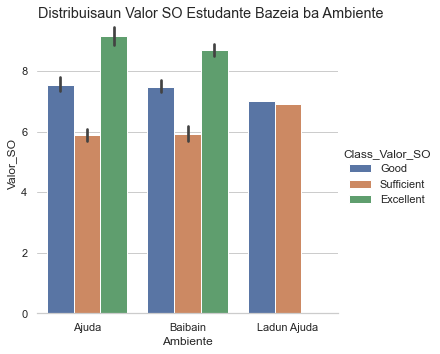

In [51]:
sns.set_theme(style="whitegrid")

#Barplot ba Klasifikasaun valor SO
g = sns.catplot(
    data=df, kind="bar",
    x="Ambiente", y="Valor_SO", hue="Class_Valor_SO"
)
g.despine(left=True)
g.set_axis_labels("Ambiente", "Valor_SO")
g.set_xticklabels(['Ajuda','Baibain', 'Ladun Ajuda'])
plt.suptitle("Distribuisaun Valor SO Estudante Bazeia ba Ambiente")

####4.13 Distribution of Grade Depent of Live with Whom

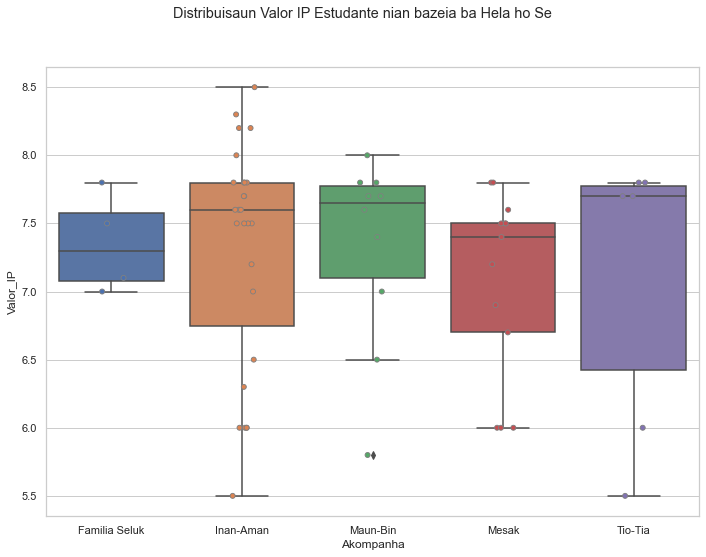

In [52]:
#Distribuisaun Valor IP Estudante nian bazeia ba Hela ho Se
ax = sns.boxplot(x = "Akompanha", y= "Valor_IP", data = df)
ax = sns.stripplot(x = "Akompanha", y= "Valor_IP", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Familia Seluk', 'Inan-Aman', 'Maun-Bin', 'Mesak', 'Tio-Tia']) #(0) - Familia Seluk (1) - Inan Aman (2) - Maun-Bin (3) - Mesak (4) - Tio-Tia
plt.suptitle("Distribuisaun Valor IP Estudante nian bazeia ba Hela ho Se")
plt.show()

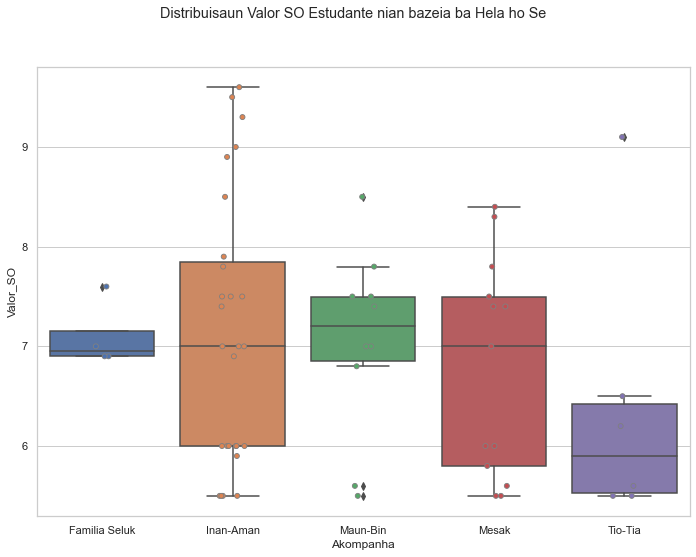

In [53]:
#Distribuisaun Valor SO Estudante nian bazeia ba Hela ho Se
ax = sns.boxplot(x = "Akompanha", y= "Valor_SO", data = df)
ax = sns.stripplot(x = "Akompanha", y= "Valor_SO", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Familia Seluk', 'Inan-Aman', 'Maun-Bin', 'Mesak', 'Tio-Tia']) #(0) - Familia Seluk (1) - Inan Aman (2) - Maun-Bin (3) - Mesak (4) - Tio-Tia
plt.suptitle("Distribuisaun Valor SO Estudante nian bazeia ba Hela ho Se")
plt.show()

####4.14 Distribution Grade Base on Where Stay

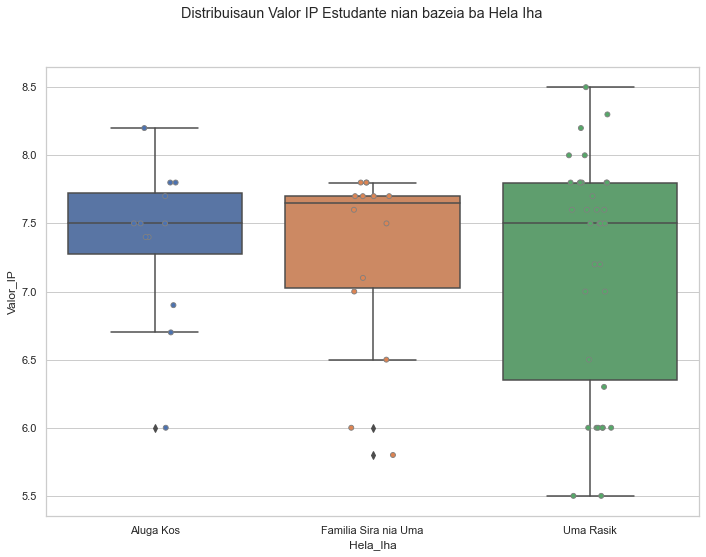

In [54]:
#Distribuisaun Valor IP Estudante nian bazeia ba Hela iha
ax = sns.boxplot(x = "Hela_Iha", y= "Valor_IP", data = df)
ax = sns.stripplot(x = "Hela_Iha", y= "Valor_IP", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Aluga Kos', 'Familia Sira nia Uma', 'Uma Rasik']) #(0) - Aluga Kos, (1) - Familia Sira nia Uma, (2) - Uma Rasik
plt.suptitle("Distribuisaun Valor IP Estudante nian bazeia ba Hela Iha")
plt.show()

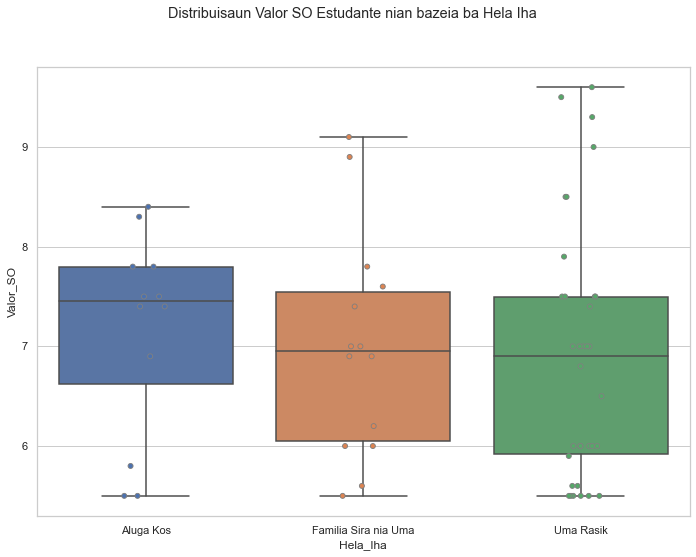

In [55]:
#Distribuisaun Valor SO Estudante nian bazeia ba Hela iha
ax = sns.boxplot(x = "Hela_Iha", y= "Valor_SO", data = df)
ax = sns.stripplot(x = "Hela_Iha", y= "Valor_SO", data = df, jitter = True, edgecolor = "grey", linewidth=.9)
ax.set_xticklabels(['Aluga Kos', 'Familia Sira nia Uma', 'Uma Rasik']) #(0) - Aluga Kos, (1) - Familia Sira nia Uma, (2) - Uma Rasik
plt.suptitle("Distribuisaun Valor SO Estudante nian bazeia ba Hela Iha")
plt.show()

###5. Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [57]:
#Deklara dataset foun
df_lin = df

In [58]:
#Foti dataset foun nia ulun
df_lin.head()

,Naran_Enumerador,Naran,NRE,Sexo,Turma,Hela_Fatin,Eskola_anterior,Edukasaun_Inan,Edukasaun_Aman,Profisaun_Inan,...,Laptop,Rede_Internet,Fatin_estuda,Ambiente,Akompanha,Hela_Iha,Valor_IP,Valor_SO,Class_Valor_IP,Class_Valor_SO
0,Marcelino R Neves,Eurico Rosario Maria,20200204022,1,0,0,1,3,3,1,...,0,0,0,0,3,0,7.8,8.3,Good,Good
1,Marcelino R Neves,Alvarino Soares Guterres,20200204003,1,0,1,1,1,4,1,...,0,0,0,0,1,2,7.5,5.5,Good,Sufficient
2,Marcelino R Neves,Pedro M. A. Abel Soares,20200204070,1,1,1,0,4,4,1,...,0,0,0,0,1,2,7.2,9.6,Good,Excellent
3,Marcelino R Neves,Marcelino R Neves,20200204054,1,1,0,2,2,6,1,...,0,0,0,0,2,2,7.8,8.5,Good,Excellent
4,Joao Soares,Jose Norberto da silva ximenes,20200204047,1,1,1,2,2,2,1,...,0,1,1,2,0,1,7.5,6.9,Good,Sufficient


In [59]:
#Drop Koluna Balun
df_lin.drop(['Naran_Enumerador', 'Naran', 'NRE'], inplace=True, axis=1)

In [60]:
#Cek koluna sira ne'ebe drop ona
df_lin.head()

,Sexo,Turma,Hela_Fatin,Eskola_anterior,Edukasaun_Inan,Edukasaun_Aman,Profisaun_Inan,Profisaun_Aman,Aktividade_Extra,Transporte,Laptop,Rede_Internet,Fatin_estuda,Ambiente,Akompanha,Hela_Iha,Valor_IP,Valor_SO,Class_Valor_IP,Class_Valor_SO
0,1,0,0,1,3,3,1,0,1,2,0,0,0,0,3,0,7.8,8.3,Good,Good
1,1,0,1,1,1,4,1,1,1,1,0,0,0,0,1,2,7.5,5.5,Good,Sufficient
2,1,1,1,0,4,4,1,1,0,0,0,0,0,0,1,2,7.2,9.6,Good,Excellent
3,1,1,0,2,2,6,1,1,0,2,0,0,0,0,2,2,7.8,8.5,Good,Excellent
4,1,1,1,2,2,2,1,0,1,2,0,1,1,2,0,1,7.5,6.9,Good,Sufficient


###Linear Single Variable

In [61]:
model = LinearRegression()

In [62]:
#Split Data
x = df_lin.iloc[:, 16].values.reshape(-1, 1)
y = df_lin.iloc[:, 17].values.reshape(-1, 1)

x,y

(array([[7.8],
        [7.5],
        [7.2],
        [7.8],
        [7.5],
        [8.2],
        [7.7],
        [8.2],
        [7.7],
        [7.8],
        [7.7],
        [7.7],
        [7.8],
        [7.5],
        [7.7],
        [7.4],
        [7. ],
        [7.8],
        [6. ],
        [6. ],
        [7.6],
        [7.4],
        [7. ],
        [7.8],
        [7.8],
        [7.6],
        [7.5],
        [7.5],
        [7.6],
        [7.6],
        [6.3],
        [7.8],
        [7.6],
        [6. ],
        [7.8],
        [6. ],
        [6. ],
        [8. ],
        [6. ],
        [8.5],
        [7.7],
        [7.1],
        [7.5],
        [8. ],
        [6.9],
        [7. ],
        [8.3],
        [6.5],
        [6.7],
        [6. ],
        [6.5],
        [5.5],
        [7.8],
        [7.5],
        [5.5],
        [5.8],
        [7.2],
        [7.8],
        [6. ],
        [7.5]]),
 array([[8.3],
        [5.5],
        [9.6],
        [8.5],
        [6.9],
        [7.8],
        

In [63]:
#Model Linear
linear_regressor = model.fit(x, y)

In [64]:
#Valor Prediksaun
y_prediksaun = linear_regressor.predict(x)
y_prediksaun

array([[7.25784906],
       [7.10100636],
       [6.94416367],
       [7.25784906],
       [7.10100636],
       [7.46697264],
       [7.20556816],
       [7.46697264],
       [7.20556816],
       [7.25784906],
       [7.20556816],
       [7.20556816],
       [7.25784906],
       [7.10100636],
       [7.20556816],
       [7.04872547],
       [6.83960188],
       [7.25784906],
       [6.3167929 ],
       [6.3167929 ],
       [7.15328726],
       [7.04872547],
       [6.83960188],
       [7.25784906],
       [7.25784906],
       [7.15328726],
       [7.10100636],
       [7.10100636],
       [7.15328726],
       [7.15328726],
       [6.47363559],
       [7.25784906],
       [7.15328726],
       [6.3167929 ],
       [7.25784906],
       [6.3167929 ],
       [6.3167929 ],
       [7.36241085],
       [6.3167929 ],
       [7.62381534],
       [7.20556816],
       [6.89188277],
       [7.10100636],
       [7.36241085],
       [6.78732098],
       [6.83960188],
       [7.51925354],
       [6.578

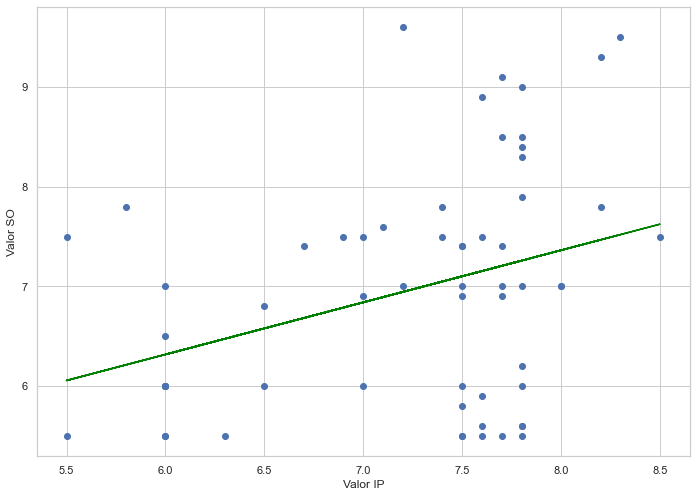

In [65]:
plt.scatter(x, y)
plt.plot(x, y_prediksaun, color='green')
plt.ylabel('Valor SO')
plt.xlabel('Valor IP')
plt.show()

In [66]:
print(model.intercept_, model.coef_, model.score(x, y))

[3.17993906] [[0.52280897]] 0.11650630410957874


In [67]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     7.648
Date:                Tue, 13 Dec 2022   Prob (F-statistic):            0.00761
Time:                        19:17:45   Log-Likelihood:                -90.556
No. Observations:                  60   AIC:                             185.1
Df Residuals:                      58   BIC:                             189.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1799      1.376      2.312      0.0

###Linear Multiple Variables

In [68]:
#Split Data
df.Class_Valor_IP = df.Class_Valor_IP.map({'Sufficient':0, 'Good': 1, 'Excellent': 2})
X = df_lin[['Hela_Fatin', 'Rede_Internet', 'Class_Valor_IP']]
y = df_lin['Valor_IP']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.7, test_size = 0.3 )

In [70]:
# Creating a new model and fitting it
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Prediction new values
predictions = multi_model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The rmse is: ', rmse)


The r2 is:  0.7718484671638938
The rmse is:  0.10965357004085943


In [71]:
predictions

array([7.64093224, 6.15650215, 6.07283588, 7.55726596, 6.07283588,
       7.55726596, 7.57555817, 7.57555817, 6.09112808, 7.57555817,
       7.57555817, 7.55726596, 7.55726596, 7.57555817, 7.57555817,
       6.07283588, 7.64093224, 7.55726596])

In [72]:
#Accuracy
multi_model.score(X_test, y_test)

0.7718484671638938

In [73]:
#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Valor_IP   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     85.30
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           7.19e-21
Time:                        19:17:45   Log-Likelihood:                -17.170
No. Observations:                  60   AIC:                             42.34
Df Residuals:                      56   BIC:                             50.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.2899      0.146     43.

C:\Users\Alex\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style='float: left; padding: 10px;'>
    <p style='font-family:'Courier New',Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                        for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
        
Valor_atual= df[['Valor_IP']].head(10)
Valor_Prediksaun = pd.DataFrame(predictions).head(10)

display('Valor_atual', 'Valor_Prediksaun')

,Valor_IP
0,7.8
1,7.5
2,7.2
3,7.8
4,7.5
5,8.2
6,7.7
7,8.2
8,7.7
9,7.8
